#### -----------------------------------------------------------------------------------------------
### Description of the project.

##### As here we predict,whether the person has chance of having the chronic kidney disease or not.And By predicting we
##### this,the person can consult with the doctor and take care of their body and take the treatment.

##### The dataset used for this project is kidney_disease.csv .

##### The attributes of this dataset are:-

##### (1) id: As every patient has their unique id(identity number).

##### (2) age: As this defines the age of the patient.

##### (3) bp: As it defines the blood pressure of the patient,and highly impact the prediction.

##### (4) And there are many more features.

##### (5) classification: As this is the most important feature,any the category here is ckd and nonckd,where 
##### ckd is chronic key disease and nonckd is non chronic key disease.

#### ---------------------------------------------------------------------------------------------------

In [1]:
#-------------------------------------------------------------------------------------
#Now we import the important library.

#Data processing(read csv and other file format) 
import pandas as pd

#Linear Algebra.
import numpy as np

#Data Visualization.
import matplotlib.pyplot as plt

#statistic visualization.
import seaborn as sns

#serialization and deserialization library.
import pickle

#Data preprocessing library(encoder and scaler library).
from sklearn.preprocessing import LabelEncoder,StandardScaler

#Data splitting and cross validation library.
from sklearn.model_selection import train_test_split,cross_val_score

#Logistic regression library.
from sklearn.linear_model import LogisticRegression

#Support Vector classifier library.
from sklearn.svm import SVC

#knn classifier library.
from sklearn.neighbors import KNeighborsClassifier

#Gaussian Naive Bayes and Bernoulli Naive Bayes classifier library.
from sklearn.naive_bayes import GaussianNB,BernoulliNB

#Decision tree classifier library.
from sklearn.tree import DecisionTreeClassifier

#Random forest classifier of ensembles bagging technique. 
from sklearn.ensemble import RandomForestClassifier

#Xtream Gradient Boosting classifier of ensemble boosting library.
from xgboost import XGBClassifier

#Light Gradient Boosting classifier of ensemble boosting library.
from lightgbm import LGBMClassifier

#statistics library i.e metrics calculation(accuracy score,confusion matrix,classification report). 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#warning handling library.
import warnings

#Ignore the warnings.
warnings.filterwarnings("ignore")

In [2]:
#Now here we read the dataset.(Here we use pandas function i.e read_csv).

chronic_df=pd.read_csv(r"kidney_disease.csv")

In [3]:
#Here we check the top records of the dataset.

chronic_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
#Now here we check the shape of the dataset.

chronic_df.shape

#The shape of the dataset is (400,26).

(400, 26)

In [5]:
#Now here we check the data type of each column.

chronic_df.dtypes

#There are 14 categorical columns and 12 numerical columns.

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [6]:
#Now here we check the no of null values present in the dataset.

chronic_df.isnull().sum()

#There is only two columns ,which does not contain any null value.

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
#Now here we check the percentage of null value present in each column.

(chronic_df.isnull().sum())/(len(chronic_df))

id                0.0000
age               0.0225
bp                0.0300
sg                0.1175
al                0.1150
su                0.1225
rbc               0.3800
pc                0.1625
pcc               0.0100
ba                0.0100
bgr               0.1100
bu                0.0475
sc                0.0425
sod               0.2175
pot               0.2200
hemo              0.1300
pcv               0.1750
wc                0.2625
rc                0.3250
htn               0.0050
dm                0.0050
cad               0.0050
appet             0.0025
pe                0.0025
ane               0.0025
classification    0.0000
dtype: float64

In [8]:
#Now here we select the top 10 columns with maximum null values.

null_percentage=(chronic_df.isnull().sum())/(len(chronic_df))
(null_percentage.sort_values(ascending=False))[:10]

#Here we see that there are many columns which contain large number of null values,so we have to handle null values.

rbc     0.3800
rc      0.3250
wc      0.2625
pot     0.2200
sod     0.2175
pcv     0.1750
pc      0.1625
hemo    0.1300
su      0.1225
sg      0.1175
dtype: float64

In [9]:
#Here we check the value counts of target variable.

chronic_df["classification"].value_counts()

#As we get one class ckd\t which is same as ckd,so make it ckd.

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [10]:
#Here we convert ckd\t to ckd.

chronic_df["classification"]=chronic_df["classification"].replace("ckd\t","ckd")

In [11]:
#Now we again check the value counts of target variable.

chronic_df["classification"].value_counts()

#Now we have only two class.

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [12]:
#Now here we check the column names of the dataset.

chronic_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [13]:
#Now here we again check the data type of each column.

chronic_df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [14]:
#Now here we classify numerical and categorical column.

num_col=['id', 'age', 'bp', 'sg', 'al', 'su','bgr','bu', 'sc', 'sod', 'pot', 'hemo',]

cat_col=['rbc', 'pc', 'pcc', 'ba','pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane']


#Now we fill the null values with appropriate values.

#Here we handle the null values of categorical column.
for i in cat_col:
 chronic_df[i]=chronic_df[i].fillna(chronic_df[i].mode()[0])

#Here we handle the null values of numerical column. 
for j in num_col:
 chronic_df[j]=chronic_df[j].fillna(chronic_df[j].mean())

In [15]:
#Now here we again check the null values in the dataset.

chronic_df.isnull().sum()

#There is no null value in any column.

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [16]:
#Now we get the complete information of the dataset.

chronic_df.info()

#Here we find the number of non-null values and data type of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [17]:
#Now here we find the descriptive statistics of the dataset.

#Here we find the description of only numeric column.
chronic_df.describe()

#Here we find the mean,std,min,max of numerical column.

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,16.974966,13.476298,0.005369,1.272318,1.029487,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000
50%,199.500000,54.000000,78.234536,1.017408,1.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437
75%,299.250000,64.000000,80.000000,1.020000,2.000000,0.450142,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [18]:
#Now here we convert the categorical column to numerical column.

cols=['rbc', 'pc', 'pcc', 'ba','pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane','classification']

#Now here we create labelencoder model object.
le=LabelEncoder()

#Here we convert the categorical column to numerical column.
for col in cols:
 chronic_df[col]=le.fit_transform(chronic_df[col])

In [19]:
#Now here we check the data type of each column of dataset.

chronic_df.dtypes

#As all the columns are converted into numerical column.

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int32
pc                  int32
pcc                 int32
ba                  int32
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int32
wc                  int32
rc                  int32
htn                 int32
dm                  int32
cad                 int32
appet               int32
pe                  int32
ane                 int32
classification      int32
dtype: object

In [20]:
#Now we check the labels of each category.

for col in chronic_df.columns:
    print(f"The level of {col} column is: {len(chronic_df[col].unique())}.")
    print()

#Here the maximum level is contained by id column.

The level of id column is: 400.

The level of age column is: 77.

The level of bp column is: 11.

The level of sg column is: 6.

The level of al column is: 7.

The level of su column is: 7.

The level of rbc column is: 2.

The level of pc column is: 2.

The level of pcc column is: 2.

The level of ba column is: 2.

The level of bgr column is: 147.

The level of bu column is: 119.

The level of sc column is: 85.

The level of sod column is: 35.

The level of pot column is: 41.

The level of hemo column is: 116.

The level of pcv column is: 44.

The level of wc column is: 92.

The level of rc column is: 46.

The level of htn column is: 2.

The level of dm column is: 5.

The level of cad column is: 3.

The level of appet column is: 2.

The level of pe column is: 2.

The level of ane column is: 2.

The level of classification column is: 2.



#### ---------------------------------------------------------------------------------------------------
### Now we  do the visualization.

##### Here we creates different plots and graphs.

#### ----------------------------------------------------------------------------------------------------

{'ckd': 250, 'notckd': 150}


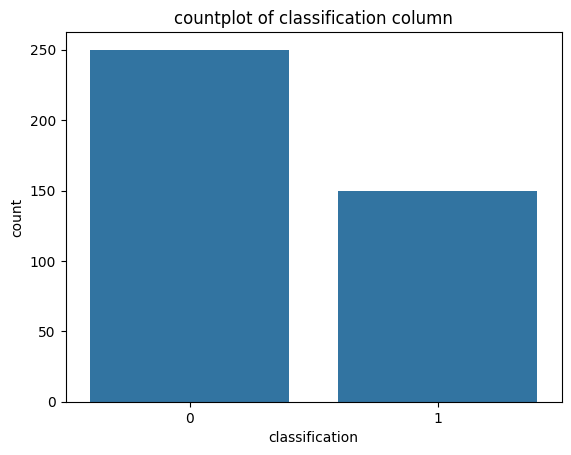

In [21]:
#Firstly we check the count plot of classification column.

sns.countplot(data=chronic_df,x="classification")
plt.title("countplot of classification column")
plt.xlabel("classification")

print(
{'ckd': 250,
'notckd': 150})

In [22]:
#Now here we calculate the null accuracy.As the classification 0 is more value,so we check for it.

null_accuracy=250/(250+150)

null_accuracy

#As the null accuracy is 62.5%.

0.625

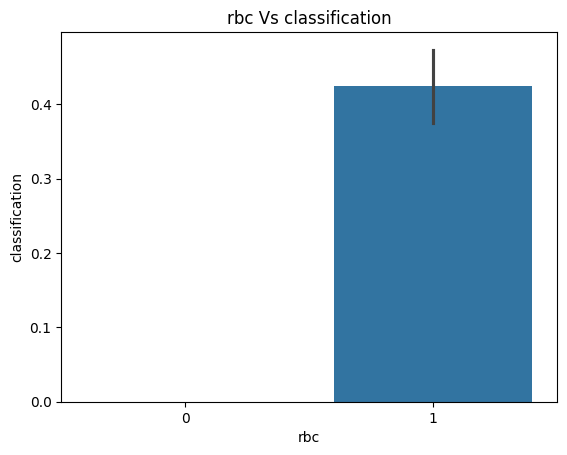

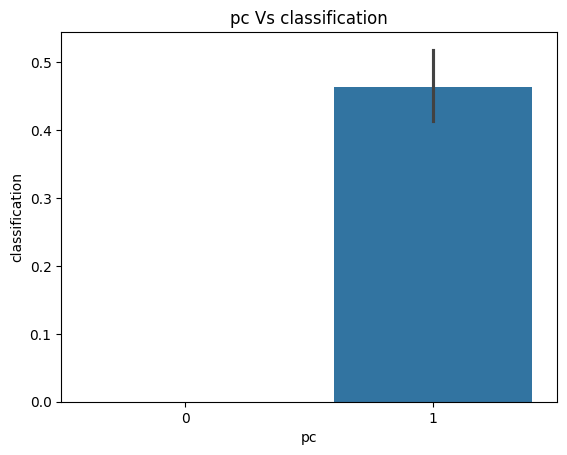

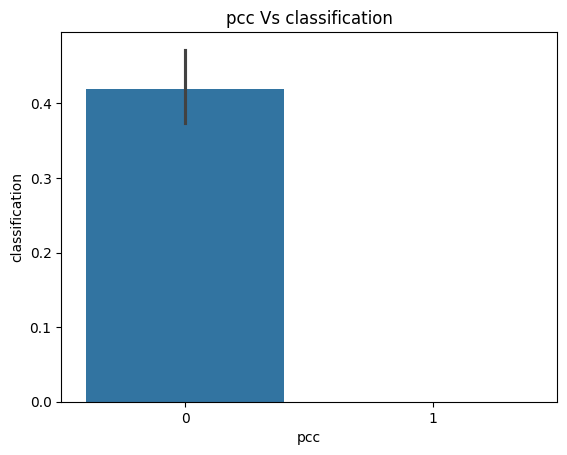

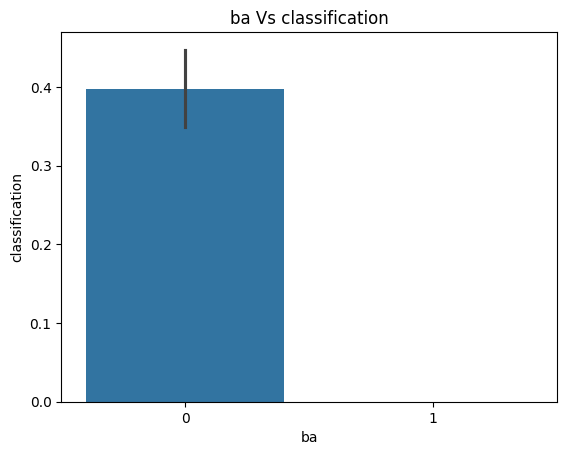

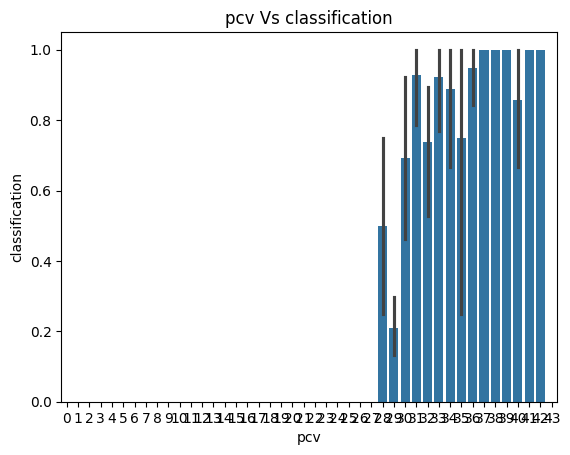

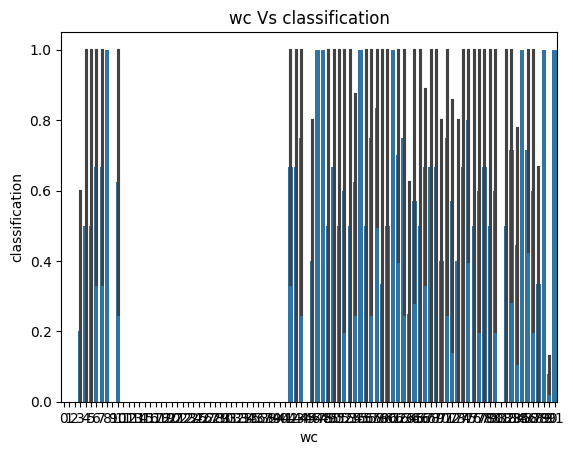

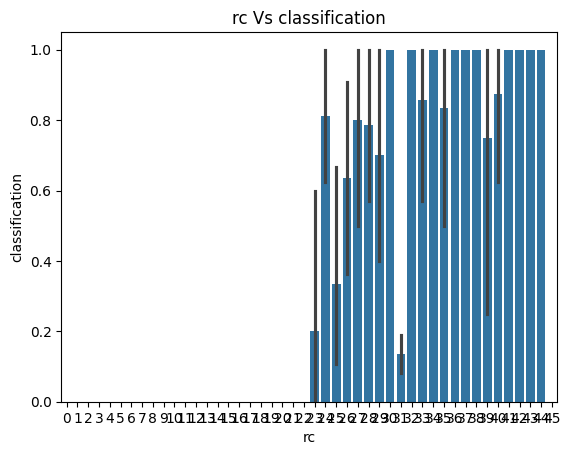

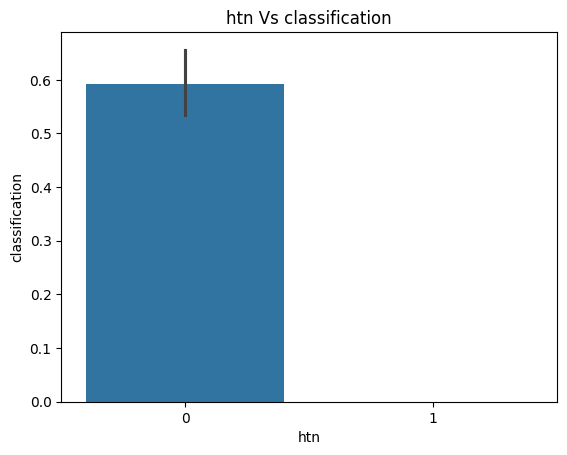

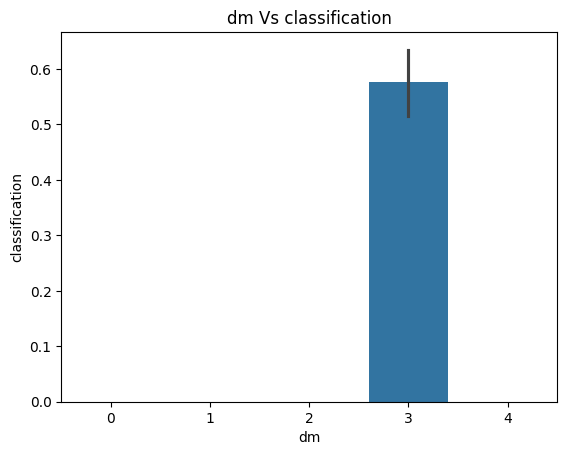

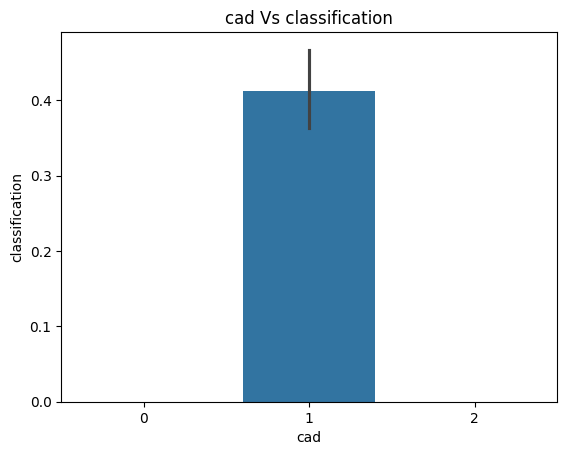

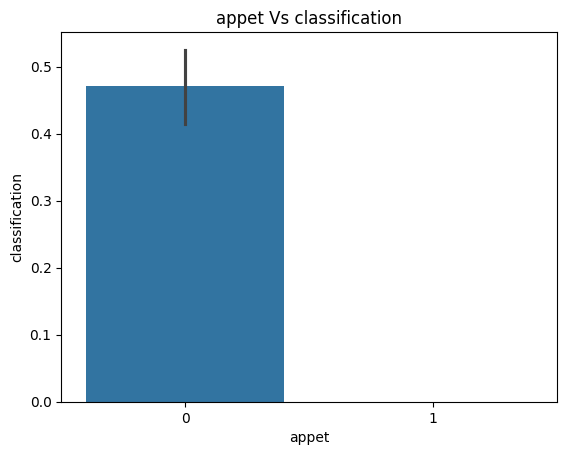

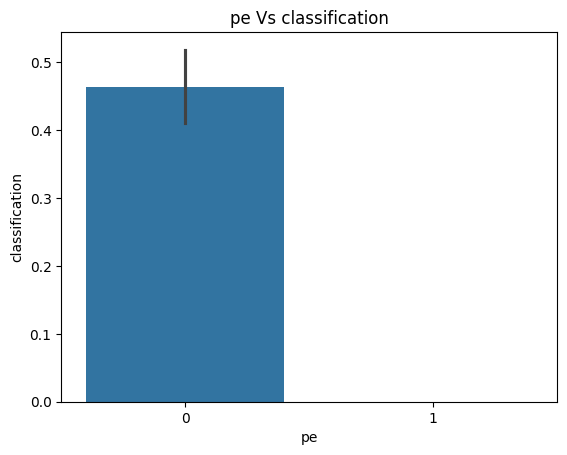

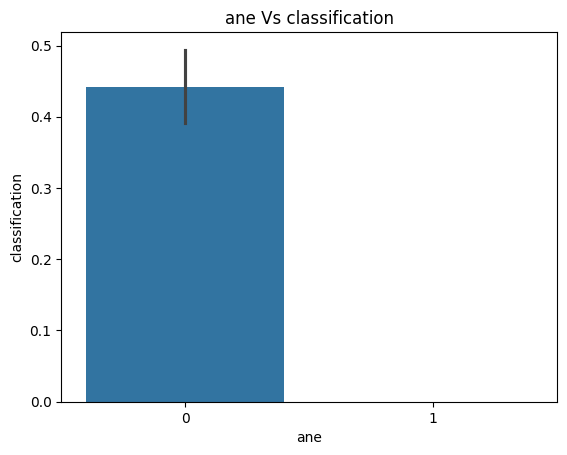

In [23]:
#Now we create the barplot of each categorical column with the target variable i.e classification.

cat_col=['rbc', 'pc', 'pcc', 'ba','pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane']

for col in cat_col:
    sns.barplot(data=chronic_df,x=col,y="classification")
    plt.title(f"{col} Vs classification")
    plt.xlabel(f"{col}")
    plt.ylabel("classification")
    plt.show()


#As we clearly get the insights from the visualization.

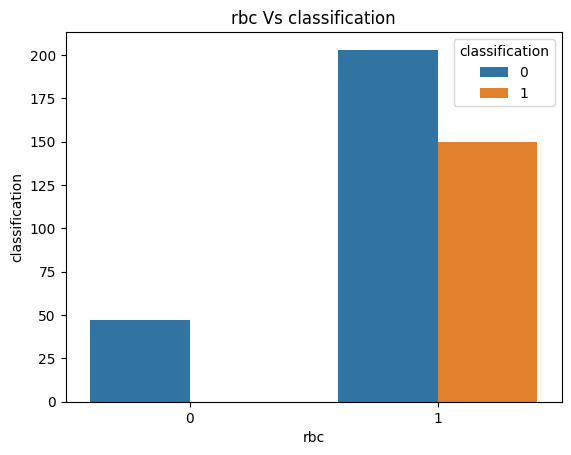

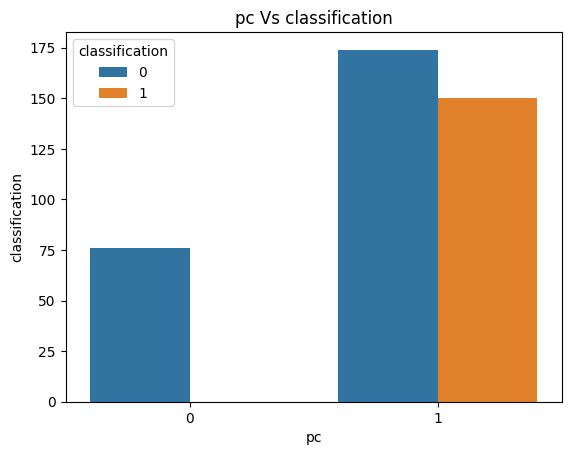

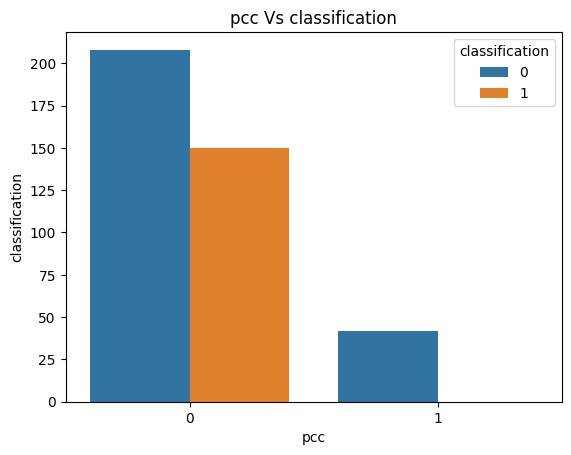

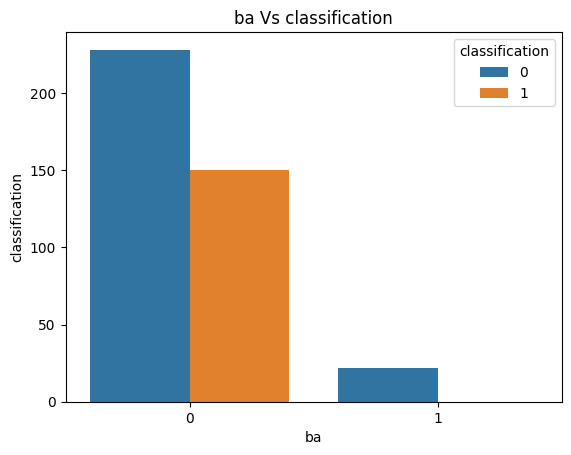

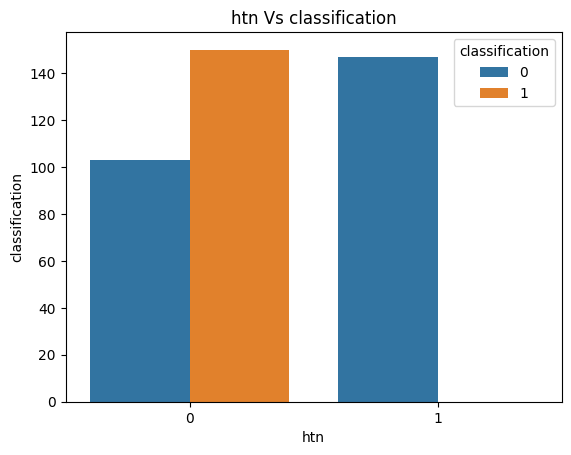

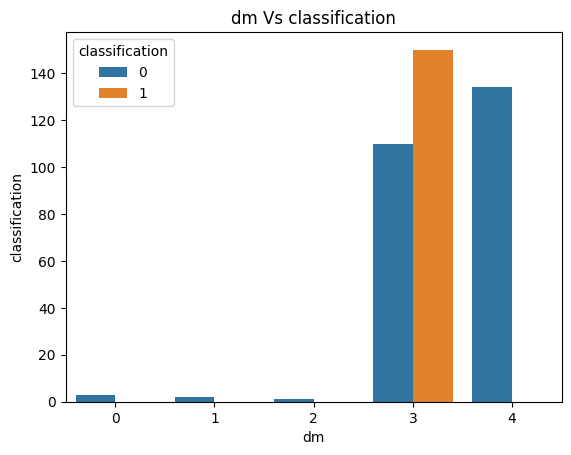

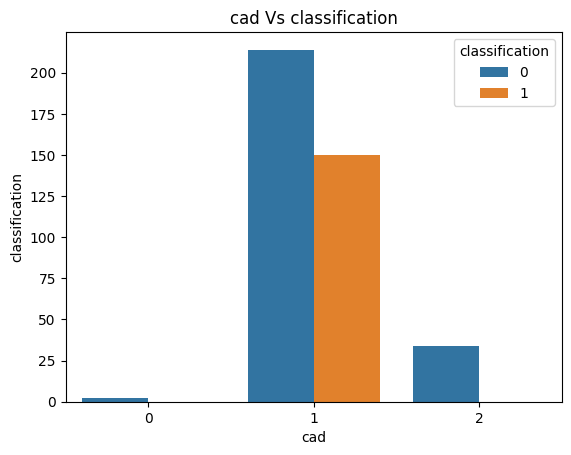

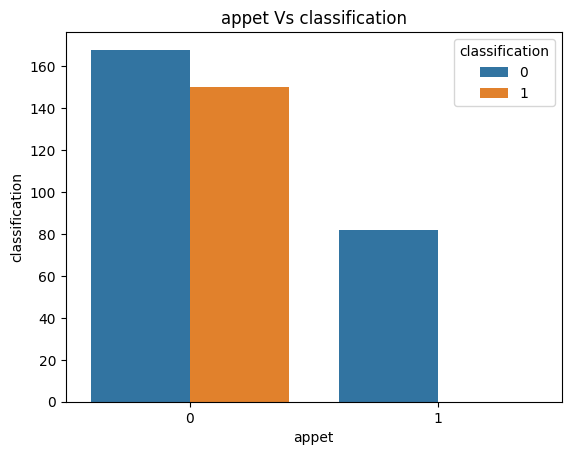

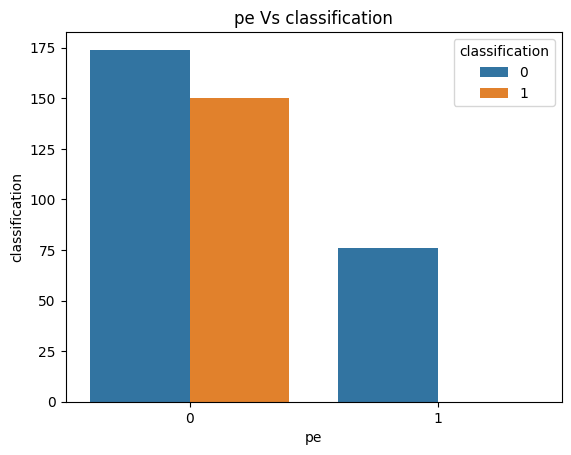

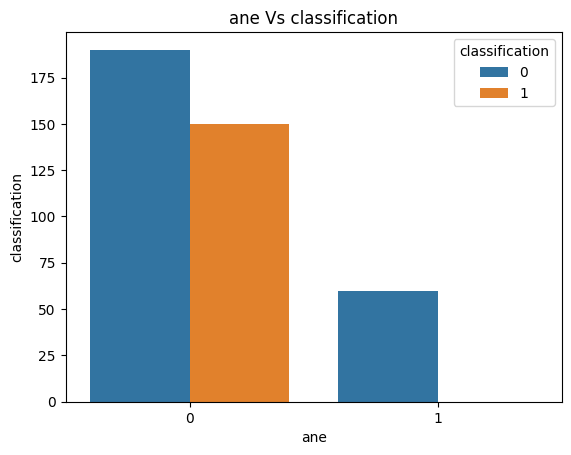

In [24]:
#Now we create the countplot of each categorical column by taking classification as hue.

cat_col=['rbc', 'pc', 'pcc', 'ba','htn', 'dm', 'cad','appet', 'pe', 'ane']

for col in cat_col:
    sns.countplot(data=chronic_df,x=col,hue="classification")
    plt.title(f"{col} Vs classification")
    plt.xlabel(f"{col}")
    plt.ylabel("classification")
    plt.show()

#Now you clearly get the insights of each plot.

In [25]:
#Now we check the correlation between the each feature of  the dataset.

#As the correlation is used to find the relation between the features and the strength.

#The correlation value ranges from -1 to +1,where there are three cases.

#case1: if the correlation value is in range (0,1],then it is positive correlated.

#case2: if the correlation value is in range [-1,0),then it is negative correlated.

#case3: if the correlation value is 0,then it is independent.

corr=chronic_df.corr()

corr

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,1.000000,-0.184043,-0.243732,0.613623,-0.520040,-0.271330,0.231457,0.335825,-0.264142,-0.115955,...,0.559927,-0.103915,0.405754,-0.520089,-0.340439,-0.176194,-0.374394,-0.308120,-0.273096,0.838528
age,-0.184043,1.000000,0.148004,-0.180570,0.114764,0.207857,-0.011783,-0.101951,0.159074,0.043573,...,-0.218646,0.043785,-0.211398,0.393440,0.293743,0.225692,0.157741,0.094434,0.050567,-0.225405
bp,-0.243732,0.148004,1.000000,-0.182463,0.146593,0.200784,-0.151369,-0.156856,0.059560,0.112173,...,-0.267013,-0.011108,-0.212332,0.270447,0.152211,0.072585,0.177601,0.054083,0.194962,-0.290600
sg,0.613623,-0.180570,-0.182463,1.000000,-0.466698,-0.287993,0.236228,0.345325,-0.290663,-0.220792,...,0.488899,-0.006333,0.384677,-0.366959,-0.250773,-0.125424,-0.246822,-0.272476,-0.213276,0.698957
al,-0.520040,0.114764,0.146593,-0.466698,1.000000,0.268070,-0.373927,-0.535157,0.399749,0.367855,...,-0.476406,-0.019264,-0.402297,0.481724,0.269855,0.228579,0.330562,0.440893,0.282305,-0.599238
su,-0.271330,0.207857,0.200784,-0.287993,0.268070,1.000000,-0.074324,-0.168826,0.151445,0.107684,...,-0.180219,0.045592,-0.155560,0.293179,0.404278,0.245523,0.080648,0.130721,0.066348,-0.327812
rbc,0.231457,-0.011783,-0.151369,0.236228,-0.373927,-0.074324,1.000000,0.377394,-0.102948,-0.184402,...,0.299237,0.062015,0.161758,-0.140538,-0.146207,-0.113848,-0.160868,-0.199285,-0.107625,0.282642
pc,0.335825,-0.101951,-0.156856,0.345325,-0.535157,-0.168826,0.377394,1.000000,-0.520118,-0.330401,...,0.398211,0.079813,0.358261,-0.291719,-0.167356,-0.152519,-0.274985,-0.350227,-0.260566,0.375154
pcc,-0.264142,0.159074,0.059560,-0.290663,0.399749,0.151445,-0.102948,-0.520118,1.000000,0.275082,...,-0.247335,-0.089209,-0.233754,0.195623,0.160626,0.187283,0.189688,0.104356,0.175861,-0.265313
ba,-0.115955,0.043573,0.112173,-0.220792,0.367855,0.107684,-0.184402,-0.330401,0.275082,1.000000,...,-0.185100,-0.112368,-0.183730,0.089046,0.083363,0.160807,0.149126,0.134732,0.052208,-0.186871


<Axes: >

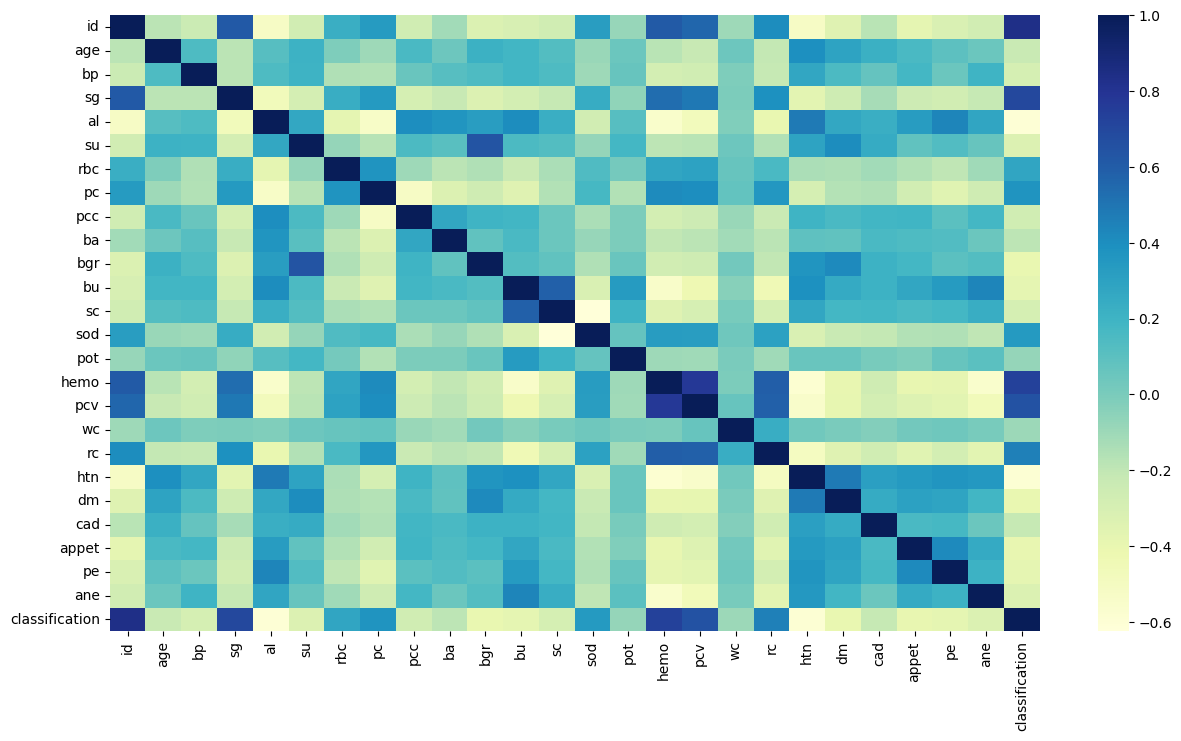

In [26]:
#Here we represents the correlation in the form of heatmap.

plt.figure(figsize=(15,8))
sns.heatmap(corr,cmap="YlGnBu")

In [27]:
#As we want to check the correlation of classification column with all other feature.Now we check it.

corr["classification"].sort_values(ascending=True)

#Positive correlated columns are hemo,sg,pcv,rc,pc.
#Negative correlated columns are al,htn,dm,bgr.

al               -0.599238
htn              -0.590438
dm               -0.401490
bgr              -0.401374
appet            -0.393341
pe               -0.375154
bu               -0.372033
su               -0.327812
ane              -0.325396
sc               -0.294079
bp               -0.290600
pcc              -0.265313
age              -0.225405
cad              -0.214320
ba               -0.186871
wc               -0.094409
pot              -0.076921
rbc               0.282642
sod               0.342288
pc                0.375154
rc                0.456467
pcv               0.650531
sg                0.698957
hemo              0.729628
id                0.838528
classification    1.000000
Name: classification, dtype: float64

In [28]:
#Now we check the record of dataset.

chronic_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,32,72,31,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,26,56,31,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,31,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,18,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,25,0,3,1,0,0,0,0


In [29]:
#Here we remove the id column.

chronic_df.drop("id",axis=1,inplace=True)

In [30]:
#Now we check the dataset.

chronic_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,32,72,31,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,26,56,31,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,19,70,31,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,20,62,18,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,23,68,25,0,3,1,0,0,0,0


#### ------------------------------------------------------------------------------------------------
### Now here we select the independent and dependent feature.

#### -------------------------------------------------------------------------------------------------

In [31]:
x=chronic_df.drop("classification",axis=1) #Independent feature

y=chronic_df["classification"] #Dependent feature

In [32]:
#Now we check the shape of independent and dependent feature.

print(f"The shape of independent feature is: {x.shape}")

#The shape of independent feature is: (400,24)

print(f"The shape of dependent feature is: {y.shape}")

#The shape of dependent feature is: (400,)

The shape of independent feature is: (400, 24)
The shape of dependent feature is: (400,)


#### --------------------------------------------------------------------------------------------
### Now here we do the train-test split.

##### We always prefer to split the dataset into train-test data in the ratio (80-20).

#### --------------------------------------------------------------------------------------------

In [33]:
#Now here we use the train_test_split function.

#Here we split the data into 80:20 and take random state as 0.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

print(f"The shape of x_train dataset is: {x_train.shape}")

#The shape of x_train is (320,24).

print(f"The shape of x_test dataset is: {x_test.shape}")

#The shape of x_test is (80,24)

print(f"The shape of y_train dataset is: {y_train.shape}")

#The shape of y_train is (320,)

print(f"The shape of y_test dataset is: {y_test.shape}")

#The shape of y_test is (80,)

The shape of x_train dataset is: (320, 24)
The shape of x_test dataset is: (80, 24)
The shape of y_train dataset is: (320,)
The shape of y_test dataset is: (80,)


#### -------------------------------------------------------------------------------------------------
### Now here we do the scaling of data using standard scaler.

##### As it is also known as z-score.

##### It ranges between -3 to +3.

##### In this we use the concept of standard normal variate i.e z=(x-u)/s,where u=0,s=1

#### ---------------------------------------------------------------------------------------------------

In [34]:
#Here we create standard scaler model object and do scaling.

#Here we create scaling object.
sc=StandardScaler()

#Here we fit and transform the x_train.
x_train_sc=sc.fit_transform(x_train)

#Here we transform the x_test.
x_test_sc=sc.transform(x_test)

In [35]:
#Now here we check the top records of the scaled data.

print(x_train_sc[:3])

#And also we check the data type of scaled data.

type(x_train_sc)

[[-1.50935703 -1.18319374  0.44885334 -0.77482544 -0.44032154  0.35043832
   0.48038446 -0.33333333 -0.21389632 -0.4028266  -0.61454177 -0.42115368
  -0.00472787 -0.01548103  0.9832693   0.04991423  0.70060907  0.35217448
  -0.7540739  -0.54551576 -0.25538221 -0.51460872 -0.4853053  -0.3992747 ]
 [ 0.23212848  0.28483932 -1.43194174 -0.77482544 -0.44032154  0.35043832
   0.48038446 -0.33333333 -0.21389632 -0.0169412   0.00943018  0.01733786
  -0.00472787 -0.01548103 -1.0527622   0.17568237  0.91757188  0.35217448
  -0.7540739  -0.54551576 -3.80852595 -0.51460872 -0.4853053  -0.3992747 ]
 [-0.92886186  0.28483932 -2.37233927  1.65089382 -0.44032154 -2.85356919
   0.48038446 -0.33333333 -0.21389632  0.0121648   0.00943018  0.01733786
  -0.00472787 -0.01548103 -1.16587506 -1.45930346  0.91757188  0.35217448
  -0.7540739  -0.54551576 -0.25538221 -0.51460872  2.06055857 -0.3992747 ]]


numpy.ndarray

In [36]:
#Now we apply classification model on the given dataset and do the prediction

#### -----------------------------------------------------------------------------------------------
### (1) Logistic Regression.

##### As when there is outlier, we use this model.Because it is able to handle the outlier.

##### As for handling the outlier we use the s-curve.

##### Here We use sigmoid curve for this algorithm.

##### Formula of sigmoid function is: y=1/(1+e^-z),where z=b0+b1x.

##### Here we choose one threshold value and when the y is equal to or greater than threshold,then we consider it as true.

##### And if the value of y is less than threshold than it is considered as false.

##### It is one of the probability based algorithm.

##### It is only used for binary classification.

#### --------------------------------------------------------------------------------------------------

In [37]:
#1(a) Here we create the logistic regression on original values.

#Here we create logistic regression model object.
lor=LogisticRegression()

#Here we train the lor model on original data.
lor.fit(x_train,y_train)

#Here we predict the values corresponding to x_test using lor model.
y_pred_lor=lor.predict(x_test)

#Here we find the bias of lor model.
bias_lor=lor.score(x_train,y_train)
print(f"The bias of lor model is: {bias_lor}.")

#Here we find the variance of lor model.
variance_lor=lor.score(x_test,y_test)
print(f"The variance of lor model is: {variance_lor}.")

The bias of lor model is: 0.98125.
The variance of lor model is: 0.9625.


In [38]:
#1(b) Here we create the logistic regression on scaled values.

#Here we create logistic regression model object.
lor1=LogisticRegression()

#Here we train the lor1 model on scaled data.
lor1.fit(x_train_sc,y_train)

#Here we predict the values corresponding to x_test_sc using lor1 model.
y_pred_lor1=lor1.predict(x_test_sc)

#Here we find the bias of lor1 model.
bias_lor1=lor1.score(x_train_sc,y_train)
print(f"The bias of lor1 model is: {bias_lor1}.")

#Here we find the variance of lor1 model.
variance_lor1=lor1.score(x_test_sc,y_test)
print(f"The variance of lor1 model is: {variance_lor1}.")

The bias of lor1 model is: 1.0.
The variance of lor1 model is: 0.9875.


#### -------------------------------------------------------------------------------------------------
### Conclusion of Logistic regression is: 

##### As for the lor1 model, bias is 100% and variance is 98.75%.

##### As for the lor model, bias is 98.12%  and variance is 96.25%.

#### --------------------------------------------------------------------------------------------------

The training accuracy of lor1 model is: 1.0.
The testing accuracy of lor1 model is: 0.9875.
The confusion matrix of lor1 model is: 
[[51  1]
 [ 0 28]]

The dataframe of lor1 model is: 
                 Actual Yes:1  Actual No:0
Predicted Yes:1            51            1
Actual No:0                 0           28


The accuracy of lor1 model is: 0.9875.

The error of lor1 model is: 0.012499999999999956.

The precision of lor1 model is: 0.9807692307692307.

The recall of lor1 model is: 1.0.

The f1_score of lor1 model is: 0.9902912621359222.

The true positive rate of lor1 model is: 1.0.

The false positive rate of lor1 model is: 0.034482758620689655.

The classification report of lor1 model is: 
[[51  1]
 [ 0 28]]


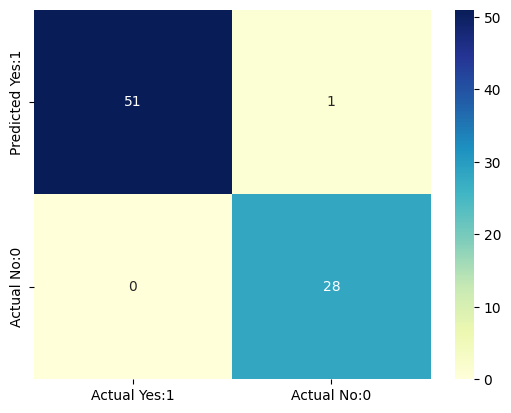

In [39]:
#Now here we find the statistics of lor1 model.

#Here we find the train accuracy of lor1 model.
y_pred_train_lor1=lor1.predict(x_train_sc)
ac_train_lor1=accuracy_score(y_train,y_pred_train_lor1)
print(f"The training accuracy of lor1 model is: {ac_train_lor1}.")

#Here we find the test accuracy of lor1 model.
ac_test_lor1=accuracy_score(y_test,y_pred_lor1)
print(f"The testing accuracy of lor1 model is: {ac_test_lor1}.")

#Now here we find the confusion matrix of lor1 model.
cm_lor1=confusion_matrix(y_test,y_pred_lor1)
print("The confusion matrix of lor1 model is: ")
print(cm_lor1)
print()

#Here we create the dataframe of confusion matrix.
cm_lor1_df=pd.DataFrame(cm_lor1,columns=["Actual Yes:1","Actual No:0"],index=["Predicted Yes:1","Actual No:0"])
print("The dataframe of lor1 model is: ")
print(cm_lor1_df)
print()

#Now here we visualize the confusion matrix in the form of heat map.
sns.heatmap(cm_lor1_df,annot=True,fmt="d",cmap="YlGnBu")
print()

#Now here we find the terminologies related to confusion matrix.
tp_lor1=cm_lor1[0,0]
tn_lor1=cm_lor1[1,1]
fp_lor1=cm_lor1[0,1]
fn_lor1=cm_lor1[1,0]

#Now we find the accuracy of lor1 model using confusion matrix.
ac_lor1_cm=(tp_lor1+tn_lor1)/(tp_lor1+tn_lor1+fp_lor1+fn_lor1)
print(f"The accuracy of lor1 model is: {ac_lor1_cm}.")
print()

#Now we find the error of lor1 model using confusion matrix.
error_lor1_cm=1-ac_lor1_cm
print(f"The error of lor1 model is: {error_lor1_cm}.")
print()

#Now we find the precision of lor1 model using confusion matrix.
precision_lor1_cm=(tp_lor1)/(tp_lor1+fp_lor1)
print(f"The precision of lor1 model is: {precision_lor1_cm}.")
print()

#Now we find the recall of lor1 model using confusion matrix.
recall_lor1_cm=(tp_lor1)/(tp_lor1+fn_lor1)
print(f"The recall of lor1 model is: {recall_lor1_cm}.")
print()

#Now we find the f1-score of lor1 model using confusion matrix.
f1_score_lor1_cm=(2*precision_lor1_cm*recall_lor1_cm)/(precision_lor1_cm+recall_lor1_cm)
print(f"The f1_score of lor1 model is: {f1_score_lor1_cm}.")
print()

#Now we find the tpr of lor1 model using confusion matrix.
sensitivity_lor1=tpr_lor1_cm=(tp_lor1)/(tp_lor1+fn_lor1)
print(f"The true positive rate of lor1 model is: {tpr_lor1_cm}.")
print()

#Now we find the fpr of lor1 model using confusion matrix.
fpr_lor1_cm=(fp_lor1)/(tn_lor1+fp_lor1)
print(f"The false positive rate of lor1 model is: {fpr_lor1_cm}.")
print()

#Now here we find the classification report of lor1 model.
cr_lor1=classification_report(y_test,y_pred_lor1)
print("The classification report of lor1 model is: ")
print(cm_lor1)

#### ---------------------------------------------------------------------------------------------------
### Conclusion of statistic terms of lor1 model: 

##### As the train and test accuracy,both is high.But the difference is very small,so it is best fit model.

##### As the error is 1%,precision is 98%,recall is 100%,f1_score is 99%.

##### As the tpr is 100% and fpr is 3%.

#### ----------------------------------------------------------------------------------------------------

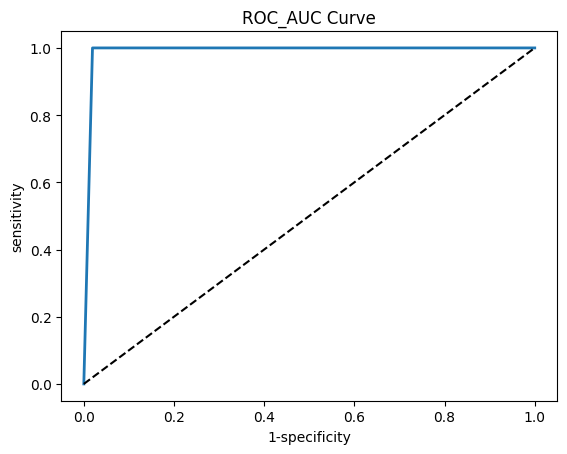

In [40]:
#Now here we create roc,auc curve.

#Here we import roc_curve function.
from sklearn.metrics import roc_curve

#Here we find the fpr,tpr and threshold.
fpr,tpr,threshold=roc_curve(y_test,y_pred_lor1)

plt.plot(fpr,tpr,linewidth=2)

plt.plot([0,1],[0,1],"k--")

plt.title("ROC_AUC Curve")
plt.xlabel("1-specificity")
plt.ylabel("sensitivity")
plt.show()

#### -----------------------------------------------------------------------------------------------
### Conclusion of Roc-Auc curve is:

##### As the fill line shows the high accuracy and show that the model is best fit.

#### ------------------------------------------------------------------------------------------------

In [41]:
#now here we find roc-auc score of lor1.

#Here we find the roc_auc_score.
from sklearn.metrics import roc_auc_score

score=roc_auc_score(y_test,y_pred_lor1)
print(f"The roc_auc score is: {score}")

The roc_auc score is: 0.9903846153846153


#### -----------------------------------------------------------------------------------------------
### Conclusion of roc-auc scores:

##### As the score is 99%,which is closer to 100%.so it is best fit model.

#### ------------------------------------------------------------------------------------------------

In [42]:
#Now we do cross validation technique.

cross_scores=cross_val_score(estimator=lor1,X=x_train_sc,y=y_train,cv=10,scoring="accuracy")
print(f"The cross_scores of lor1 model are: {(cross_scores).mean()}.")

The cross_scores of lor1 model are: 0.99375.


#### ----------------------------------------------------------------------------------------------
### Conclusion of cross validation:

##### As the cross validation score is: 99.37%,which is greater than normal accuracy.

#### -----------------------------------------------------------------------------------------------

In [43]:
#Now we apply support vector machine.

#### -----------------------------------------------------------------------------------------------
### (2) Support Vector Classifier.

##### As the main component of svc is hyperplane,which is nothing but the best fit line for classification.

##### Then we find the support vectors i.e the nearest point of both the classes from hyperplane.

##### Then we make the parallel line to the Hyperplane that touches the support vector,this is known as decision boundary.

##### Then we find the distance between the decision boundaries,which is known as margin.

##### We always choose the maximum marginal hyperplane.

##### There is one component i.e kernel,which is used to convert low dimension to High dimension.

##### Here the constraints is if w^t*x+b>0,then it is correct classification, otherwise incorrect classification.

##### Here the constraints is that we have to minimize the ||w||/2.

##### Here the cost function is min||w||/2+ci(summation of eta).

#### -------------------------------------------------------------------------------------------------

In [44]:
#2(a) Here we create the Support Vector classifier on original values.

#Here we create Support vector classifier model object.
svc=SVC()

#Here we train the svc model on original data.
svc.fit(x_train,y_train)

#Here we predict the values corresponding to x_test using svc model.
y_pred_svc=svc.predict(x_test)

#Here we find the bias of svc model.
bias_svc=svc.score(x_train,y_train)
print(f"The bias of svc model is: {bias_svc}.")

#Here we find the variance of svc model.
variance_svc=svc.score(x_test,y_test)
print(f"The variance of svc model is: {variance_svc}.")

The bias of svc model is: 0.85.
The variance of svc model is: 0.875.


In [45]:
#2(b) Here we create the Support Vector classifier on scaled values.

#Here we create Support vector classifier model object.
svc1=SVC()

#Here we train the svc1 model on scaled data.
svc1.fit(x_train_sc,y_train)

#Here we predict the values corresponding to x_test_sc using svc model.
y_pred_svc1=svc1.predict(x_test_sc)

#Here we find the bias of svc1 model.
bias_svc1=svc1.score(x_train_sc,y_train)
print(f"The bias of svc1 model is: {bias_svc1}.")

#Here we find the variance of svc1 model.
variance_svc1=svc1.score(x_test_sc,y_test)
print(f"The variance of svc1 model is: {variance_svc1}.")

The bias of svc1 model is: 0.996875.
The variance of svc1 model is: 0.9875.


#### -------------------------------------------------------------------------------------------------
### Conclusion of Support Vector classifier is: 

##### As for the svc1 model, bias is 99.68% and variance is 98.75%.

##### As for the svc1 model, bias is 85%  and variance is 87.50%.

#### --------------------------------------------------------------------------------------------------

The training accuracy of svc1 model is: 0.996875.
The testing accuracy of svc1 model is: 0.9875.
The confusion matrix of svc1 model is: 
[[51  1]
 [ 0 28]]

The dataframe of svc1 model is: 
                 Actual Yes:1  Actual No:0
Predicted Yes:1            51            1
Actual No:0                 0           28


The accuracy of svc1 model is: 0.9875.

The error of svc1 model is: 0.012499999999999956.

The precision of svc1 model is: 0.9807692307692307.

The recall of svc1 model is: 1.0.

The f1_score of svc1 model is: 0.9902912621359222.

The true positive rate of svc1 model is: 1.0.

The false positive rate of svc1 model is: 0.034482758620689655.

The classification report of svc1 model is: 
[[51  1]
 [ 0 28]]


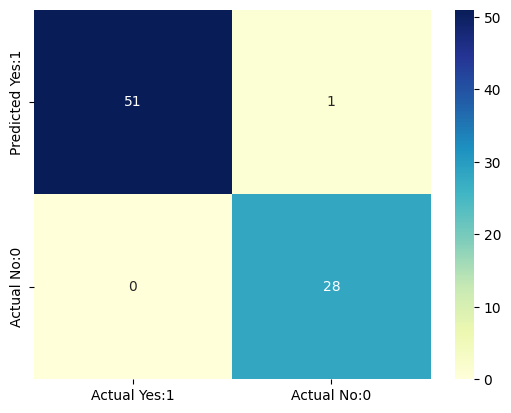

In [46]:
#Now here we find the statistics of svc1 model.

#Here we find the train accuracy of svc1 model.
y_pred_train_svc1=svc1.predict(x_train_sc)
ac_train_svc1=accuracy_score(y_train,y_pred_train_svc1)
print(f"The training accuracy of svc1 model is: {ac_train_svc1}.")

#Here we find the test accuracy of svc1 model.
ac_test_svc1=accuracy_score(y_test,y_pred_svc1)
print(f"The testing accuracy of svc1 model is: {ac_test_svc1}.")

#Now here we find the confusion matrix of svc1 model.
cm_svc1=confusion_matrix(y_test,y_pred_svc1)
print("The confusion matrix of svc1 model is: ")
print(cm_svc1)
print()

#Here we create the dataframe of confusion matrix.
cm_svc1_df=pd.DataFrame(cm_svc1,columns=["Actual Yes:1","Actual No:0"],index=["Predicted Yes:1","Actual No:0"])
print("The dataframe of svc1 model is: ")
print(cm_svc1_df)
print()

#Now here we visualize the confusion matrix in the form of heat map.
sns.heatmap(cm_svc1_df,annot=True,fmt="d",cmap="YlGnBu")
print()

#Now here we find the terminologies related to confusion matrix.
tp_svc1=cm_svc1[0,0]
tn_svc1=cm_svc1[1,1]
fp_svc1=cm_svc1[0,1]
fn_svc1=cm_svc1[1,0]

#Now we find the accuracy of svc1 model using confusion matrix.
ac_svc1_cm=(tp_svc1+tn_svc1)/(tp_svc1+tn_svc1+fp_svc1+fn_svc1)
print(f"The accuracy of svc1 model is: {ac_svc1_cm}.")
print()

#Now we find the error of svc1 model using confusion matrix.
error_svc1_cm=1-ac_svc1_cm
print(f"The error of svc1 model is: {error_svc1_cm}.")
print()

#Now we find the precision of svc1 model using confusion matrix.
precision_svc1_cm=(tp_svc1)/(tp_svc1+fp_svc1)
print(f"The precision of svc1 model is: {precision_svc1_cm}.")
print()

#Now we find the recall of svc1 model using confusion matrix.
recall_svc1_cm=(tp_svc1)/(tp_svc1+fn_svc1)
print(f"The recall of svc1 model is: {recall_svc1_cm}.")
print()

#Now we find the f1-score of svc1 model using confusion matrix.
f1_score_svc1_cm=(2*precision_svc1_cm*recall_svc1_cm)/(precision_svc1_cm+recall_svc1_cm)
print(f"The f1_score of svc1 model is: {f1_score_svc1_cm}.")
print()

#Now we find the tpr of svc1 model using confusion matrix.
sensitivity_svc1=tpr_svc1_cm=(tp_svc1)/(tp_svc1+fn_svc1)
print(f"The true positive rate of svc1 model is: {tpr_svc1_cm}.")
print()

#Now we find the fpr of svc1 model using confusion matrix.
fpr_svc1_cm=(fp_svc1)/(tn_svc1+fp_svc1)
print(f"The false positive rate of svc1 model is: {fpr_svc1_cm}.")
print()

#Now here we find the classification report of svc1 model.
cr_svc1=classification_report(y_test,y_pred_svc1)
print("The classification report of svc1 model is: ")
print(cm_svc1)

#### ---------------------------------------------------------------------------------------------------
### Conclusion of statistic terms of svc1 model: 

##### As the train and test accuracy,both is high.But the difference is very small,so it is best fit model.

##### As the error is 1%,precision is 98%,recall is 100%,f1_score is 99%.

##### As the tpr is 100% and fpr is 3%.

#### ----------------------------------------------------------------------------------------------------

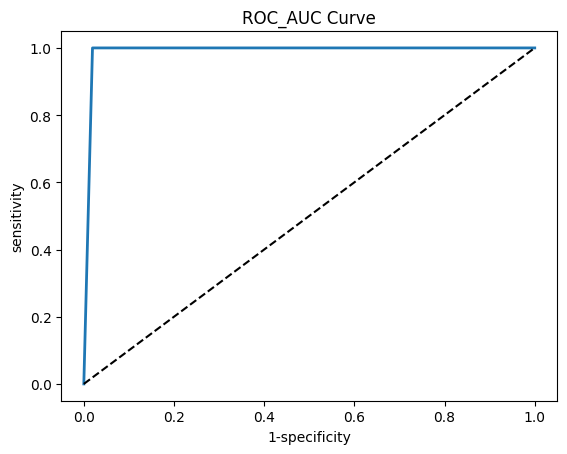

In [47]:
#Now here we create roc,auc curve.

#Here we import roc_curve function.
from sklearn.metrics import roc_curve

#Here we find the fpr,tpr and threshold.
fpr,tpr,threshold=roc_curve(y_test,y_pred_svc1)

plt.plot(fpr,tpr,linewidth=2)

plt.plot([0,1],[0,1],"k--")

plt.title("ROC_AUC Curve")
plt.xlabel("1-specificity")
plt.ylabel("sensitivity")
plt.show()

#### -----------------------------------------------------------------------------------------------
### Conclusion of Roc-Auc curve is:

##### As the fill line shows the high accuracy and show that the model is best fit.

#### ------------------------------------------------------------------------------------------------

In [48]:
#now here we find roc-auc score of svc1.

#Here we find the roc_auc_score.
from sklearn.metrics import roc_auc_score

score=roc_auc_score(y_test,y_pred_svc1)
print(f"The roc_auc score is: {score}")

The roc_auc score is: 0.9903846153846153


#### -----------------------------------------------------------------------------------------------
### Conclusion of roc-auc scores:

##### As the score is 99%,which is closer to 100%.so it is best fit model.

#### ------------------------------------------------------------------------------------------------

In [49]:
#Now we do cross validation technique.

cross_scores=cross_val_score(estimator=svc1,X=x_train_sc,y=y_train,cv=10,scoring="accuracy")
print(f"The cross_scores of svc1 model are: {(cross_scores).mean()}.")

The cross_scores of svc1 model are: 0.99375.


#### ----------------------------------------------------------------------------------------------
### Conclusion of cross validation:

##### As the cross validation score is: 99.37%,which is greater than normal accuracy.

#### -----------------------------------------------------------------------------------------------

In [50]:
#Now we apply knearest neighbour classifier model.

#### -----------------------------------------------------------------------------------------------
### (3) Knearest neighbour classifier.

##### As the knn model uses the distance matrix such as euclidean matrix(far) and manhattan distance(short)

##### Here we first choose the number of k value.

##### Then we find the distance of new point with all the present points.

##### After that we choose the k nearest values based on distance matrix.

##### Then we count the  values belongs to different class and choose the class from where we get maximum values.

##### As it useful for better classification,but it affected by outlier.

#### -------------------------------------------------------------------------------------------------

In [51]:
#3(a) Here we create the knearest neigbour classifier on original values.

#Here we create knc classifier model object.
knc=KNeighborsClassifier()

#Here we train the knc model on original data.
knc.fit(x_train,y_train)

#Here we predict the values corresponding to x_test using knc model.
y_pred_knc=knc.predict(x_test)

#Here we find the bias of knc model.
bias_knc=knc.score(x_train,y_train)
print(f"The bias of knc model is: {bias_knc}.")

#Here we find the variance of knc model.
variance_knc=knc.score(x_test,y_test)
print(f"The variance of knc model is: {variance_knc}.")

The bias of knc model is: 0.909375.
The variance of knc model is: 0.9.


In [52]:
#3(b) Here we create the knearest neigbour classifier on scaled values.

#Here we create knc classifier model object.
knc1=KNeighborsClassifier()

#Here we train the knc1 model on scaled data.
knc1.fit(x_train_sc,y_train)

#Here we predict the values corresponding to x_test_sc using knc1 model.
y_pred_knc1=knc1.predict(x_test_sc)

#Here we find the bias of knc1 model.
bias_knc1=knc1.score(x_train_sc,y_train)
print(f"The bias of knc1 model is: {bias_knc1}.")

#Here we find the variance of knc1 model.
variance_knc1=knc1.score(x_test_sc,y_test)
print(f"The variance of knc1 model is: {variance_knc1}.")

The bias of knc1 model is: 0.96875.
The variance of knc1 model is: 0.9875.


#### -------------------------------------------------------------------------------------------------
### Conclusion of knearest neighbour classifier is: 

##### As for the knc1 model, bias is 96.87% and variance is 98.75%.

##### As for the knc1 model, bias is 90.93%  and variance is 90%.

#### --------------------------------------------------------------------------------------------------

The training accuracy of knc1 model is: 0.996875.
The testing accuracy of knc1 model is: 0.9875.
The confusion matrix of knc1 model is: 
[[51  1]
 [ 0 28]]

The dataframe of knc1 model is: 
                 Actual Yes:1  Actual No:0
Predicted Yes:1            51            1
Actual No:0                 0           28


The accuracy of knc1 model is: 0.9875.

The error of knc1 model is: 0.012499999999999956.

The precision of knc1 model is: 0.9807692307692307.

The recall of knc1 model is: 1.0.

The f1_score of knc1 model is: 0.9902912621359222.

The true positive rate of knc1 model is: 1.0.

The false positive rate of knc1 model is: 0.034482758620689655.

The classification report of knc1 model is: 
[[51  1]
 [ 0 28]]


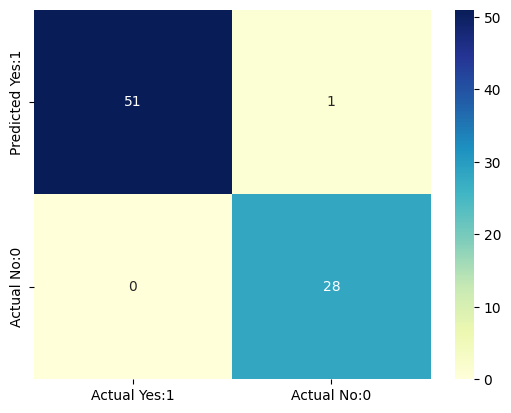

In [53]:
#Now here we find the statistics of knc1 model.

#Here we find the train accuracy of knc1 model.
y_pred_train_knc1=knc1.predict(x_train_sc)
ac_train_knc1=accuracy_score(y_train,y_pred_train_svc1)
print(f"The training accuracy of knc1 model is: {ac_train_knc1}.")

#Here we find the test accuracy of knc1 model.
ac_test_knc1=accuracy_score(y_test,y_pred_knc1)
print(f"The testing accuracy of knc1 model is: {ac_test_knc1}.")

#Now here we find the confusion matrix of knc1 model.
cm_knc1=confusion_matrix(y_test,y_pred_knc1)
print("The confusion matrix of knc1 model is: ")
print(cm_knc1)
print()

#Here we create the dataframe of confusion matrix.
cm_knc1_df=pd.DataFrame(cm_knc1,columns=["Actual Yes:1","Actual No:0"],index=["Predicted Yes:1","Actual No:0"])
print("The dataframe of knc1 model is: ")
print(cm_knc1_df)
print()

#Now here we visualize the confusion matrix in the form of heat map.
sns.heatmap(cm_knc1_df,annot=True,fmt="d",cmap="YlGnBu")
print()

#Now here we find the terminologies related to confusion matrix.
tp_knc1=cm_knc1[0,0]
tn_knc1=cm_knc1[1,1]
fp_knc1=cm_knc1[0,1]
fn_knc1=cm_knc1[1,0]

#Now we find the accuracy of knc1 model using confusion matrix.
ac_knc1_cm=(tp_knc1+tn_knc1)/(tp_knc1+tn_knc1+fp_knc1+fn_knc1)
print(f"The accuracy of knc1 model is: {ac_knc1_cm}.")
print()

#Now we find the error of knc1 model using confusion matrix.
error_knc1_cm=1-ac_knc1_cm
print(f"The error of knc1 model is: {error_knc1_cm}.")
print()

#Now we find the precision of knc1 model using confusion matrix.
precision_knc1_cm=(tp_knc1)/(tp_knc1+fp_knc1)
print(f"The precision of knc1 model is: {precision_knc1_cm}.")
print()

#Now we find the recall of knc1 model using confusion matrix.
recall_knc1_cm=(tp_knc1)/(tp_knc1+fn_knc1)
print(f"The recall of knc1 model is: {recall_knc1_cm}.")
print()

#Now we find the f1-score of knc1 model using confusion matrix.
f1_score_knc1_cm=(2*precision_knc1_cm*recall_knc1_cm)/(precision_knc1_cm+recall_knc1_cm)
print(f"The f1_score of knc1 model is: {f1_score_knc1_cm}.")
print()

#Now we find the tpr of knc1 model using confusion matrix.
sensitivity_knc1=tpr_knc1_cm=(tp_knc1)/(tp_knc1+fn_knc1)
print(f"The true positive rate of knc1 model is: {tpr_knc1_cm}.")
print()

#Now we find the fpr of knc1 model using confusion matrix.
fpr_knc1_cm=(fp_knc1)/(tn_knc1+fp_knc1)
print(f"The false positive rate of knc1 model is: {fpr_knc1_cm}.")
print()

#Now here we find the classification report of knc1 model.
cr_knc1=classification_report(y_test,y_pred_knc1)
print("The classification report of knc1 model is: ")
print(cm_knc1)

#### ---------------------------------------------------------------------------------------------------
### Conclusion of statistic terms of knc1 model: 

##### As the train and test accuracy,both is high.But the difference is very small,so it is best fit model.

##### As the error is 1%,precision is 98%,recall is 100%,f1_score is 99%.

##### As the tpr is 100% and fpr is 3%.

#### ----------------------------------------------------------------------------------------------------


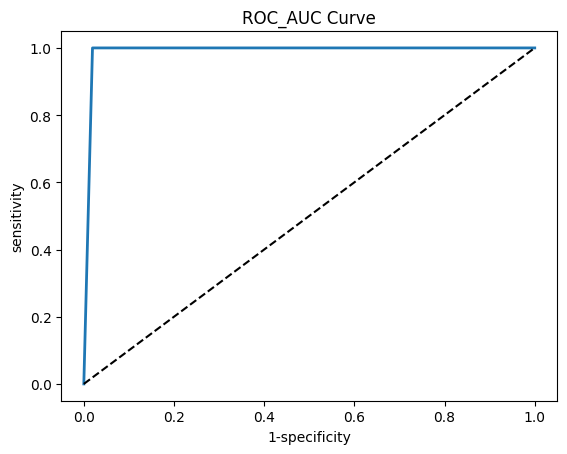

In [54]:
#Now here we create roc,auc curve.

#Here we import roc_curve function.
from sklearn.metrics import roc_curve

#Here we find the fpr,tpr and threshold.
fpr,tpr,threshold=roc_curve(y_test,y_pred_knc1)

plt.plot(fpr,tpr,linewidth=2)

plt.plot([0,1],[0,1],"k--")

plt.title("ROC_AUC Curve")
plt.xlabel("1-specificity")
plt.ylabel("sensitivity")
plt.show()

#### -----------------------------------------------------------------------------------------------
### Conclusion of Roc-Auc curve is:

##### As the fill line shows the high accuracy and show that the model is best fit.

#### ------------------------------------------------------------------------------------------------

In [55]:
#now here we find roc-auc score of knc1.

#Here we find the roc_auc_score.
from sklearn.metrics import roc_auc_score

score=roc_auc_score(y_test,y_pred_knc1)
print(f"The roc_auc score is: {score}")

The roc_auc score is: 0.9903846153846153


#### -----------------------------------------------------------------------------------------------
### Conclusion of roc-auc scores:

##### As the score is 99%,which is closer to 100%.so it is best fit model.

#### ------------------------------------------------------------------------------------------------

In [56]:
#Now we do cross validation technique.

cross_scores=cross_val_score(estimator=knc1,X=x_train_sc,y=y_train,cv=10,scoring="accuracy")
print(f"The cross_scores of knc1 model are: {(cross_scores).mean()}.")

The cross_scores of knc1 model are: 0.959375.


#### ----------------------------------------------------------------------------------------------
### Conclusion of cross validation:

##### As the cross validation score is: 95.93%,which is less than normal accuracy.

#### -----------------------------------------------------------------------------------------------

In [57]:
#Now we apply decision tree classifier.

#### ----------------------------------------------------------------------------------------------
### (4) Decision Tree Classifier.

##### As it works on the tree data structure and we build the tree and do classification.

##### As there are three different nodes,such as root node,decision node and outcome node.

##### The root node is the starting node and has the complete information.

##### The decision nodes are the nodes which split into sub node bbased on decision.

##### As outcome node is the leaf node,which defines the prediction.

##### Here we use the technique i.e attribute selection measure.

##### In ASM,we use the information gain and gini or entropy impurity.

##### Formula of entropy is: H(S)=-((p+logp+)+(p-logp-)).It ranges from 0 to 1.

##### Formula of gini is: G(s)=1-(summation of p^2).It ranges from 0 to 0.5.

##### We choose that independent feature as root node,for which the information gain is maximum.

#### ------------------------------------------------------------------------------------------------

In [58]:
#4(a) Here we create the decision tree classifier on original values.

#Here we create dtc classifier model object.
dtc=DecisionTreeClassifier()

#Here we train the dtc model on original data.
dtc.fit(x_train,y_train)

#Here we predict the values corresponding to x_test using dtc model.
y_pred_dtc=dtc.predict(x_test)

#Here we find the bias of dtc model.
bias_dtc=dtc.score(x_train,y_train)
print(f"The bias of dtc model is: {bias_dtc}.")

#Here we find the variance of dtc model.
variance_dtc=dtc.score(x_test,y_test)
print(f"The variance of dtc model is: {variance_dtc}.")

The bias of dtc model is: 1.0.
The variance of dtc model is: 1.0.


In [59]:
#4(b) Here we create the decision tree classifier on scaled values.

#Here we create dtc1 classifier model object.
dtc1=DecisionTreeClassifier()

#Here we train the dtc1 model on scaled data.
dtc1.fit(x_train_sc,y_train)

#Here we predict the values corresponding to x_test_sc using dtc1 model.
y_pred_dtc1=dtc1.predict(x_test_sc)

#Here we find the bias of dtc1 model.
bias_dtc1=dtc1.score(x_train_sc,y_train)
print(f"The bias of dtc1 model is: {bias_dtc1}.")

#Here we find the variance of dtc1 model.
variance_dtc1=dtc1.score(x_test_sc,y_test)
print(f"The variance of dtc1 model is: {variance_dtc1}.")

The bias of dtc1 model is: 1.0.
The variance of dtc1 model is: 1.0.


#### -------------------------------------------------------------------------------------------------
### Conclusion of Decision tree classifier is: 

##### As for the dtc1 model, bias is 100% and variance is 100%.

##### As for the dtc1 model, bias is 100%  and variance is 100%.

#### --------------------------------------------------------------------------------------------------

The training accuracy of dtc model is: 1.0.
The testing accuracy of dtc model is: 1.0.
The confusion matrix of dtc model is: 
[[52  0]
 [ 0 28]]

The dataframe of dtc model is: 
                 Actual Yes:1  Actual No:0
Predicted Yes:1            52            0
Actual No:0                 0           28


The accuracy of dtc model is: 1.0.

The error of dtc model is: 0.0.

The precision of dtc model is: 1.0.

The recall of dtc model is: 1.0.

The f1_score of dtc model is: 1.0.

The true positive rate of dtc model is: 1.0.

The false positive rate of dtc model is: 0.0.

The classification report of dtc model is: 
[[52  0]
 [ 0 28]]


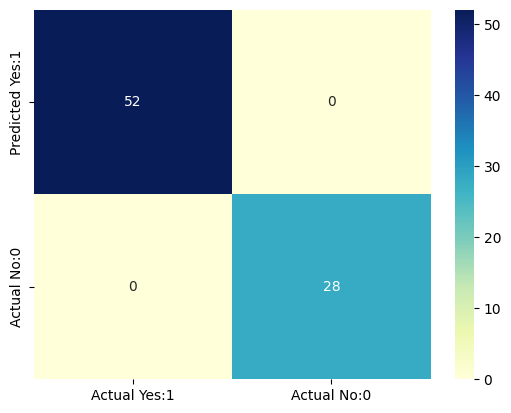

In [60]:
#Now here we find the statistics of dtc model.

#Here we find the train accuracy of dtc model.
y_pred_train_dtc=dtc.predict(x_train)
ac_train_dtc=accuracy_score(y_train,y_pred_train_dtc)
print(f"The training accuracy of dtc model is: {ac_train_dtc}.")

#Here we find the test accuracy of dtc model.
ac_test_dtc=accuracy_score(y_test,y_pred_dtc)
print(f"The testing accuracy of dtc model is: {ac_test_dtc}.")

#Now here we find the confusion matrix of dtc model.
cm_dtc=confusion_matrix(y_test,y_pred_dtc)
print("The confusion matrix of dtc model is: ")
print(cm_dtc)
print()

#Here we create the dataframe of confusion matrix.
cm_dtc_df=pd.DataFrame(cm_dtc,columns=["Actual Yes:1","Actual No:0"],index=["Predicted Yes:1","Actual No:0"])
print("The dataframe of dtc model is: ")
print(cm_dtc_df)
print()

#Now here we visualize the confusion matrix in the form of heat map.
sns.heatmap(cm_dtc_df,annot=True,fmt="d",cmap="YlGnBu")
print()

#Now here we find the terminologies related to confusion matrix.
tp_dtc=cm_dtc[0,0]
tn_dtc=cm_dtc[1,1]
fp_dtc=cm_dtc[0,1]
fn_dtc=cm_dtc[1,0]

#Now we find the accuracy of dtc model using confusion matrix.
ac_dtc_cm=(tp_dtc+tn_dtc)/(tp_dtc+tn_dtc+fp_dtc+fn_dtc)
print(f"The accuracy of dtc model is: {ac_dtc_cm}.")
print()

#Now we find the error of dtc model using confusion matrix.
error_dtc_cm=1-ac_dtc_cm
print(f"The error of dtc model is: {error_dtc_cm}.")
print()

#Now we find the precision of dtc model using confusion matrix.
precision_dtc_cm=(tp_dtc)/(tp_dtc+fp_dtc)
print(f"The precision of dtc model is: {precision_dtc_cm}.")
print()

#Now we find the recall of dtc model using confusion matrix.
recall_dtc_cm=(tp_dtc)/(tp_dtc+fn_dtc)
print(f"The recall of dtc model is: {recall_dtc_cm}.")
print()

#Now we find the f1-score of dtc model using confusion matrix.
f1_score_dtc_cm=(2*precision_dtc_cm*recall_dtc_cm)/(precision_dtc_cm+recall_dtc_cm)
print(f"The f1_score of dtc model is: {f1_score_dtc_cm}.")
print()

#Now we find the tpr of dtc model using confusion matrix.
sensitivity_dtc=tpr_dtc_cm=(tp_dtc)/(tp_dtc+fn_dtc)
print(f"The true positive rate of dtc model is: {tpr_dtc_cm}.")
print()

#Now we find the fpr of dtc model using confusion matrix.
fpr_dtc_cm=(fp_dtc)/(tn_dtc+fp_dtc)
print(f"The false positive rate of dtc model is: {fpr_dtc_cm}.")
print()

#Now here we find the classification report of dtc model.
cr_dtc=classification_report(y_test,y_pred_dtc)
print("The classification report of dtc model is: ")
print(cm_dtc)

#### ---------------------------------------------------------------------------------------------------
### Conclusion of statistic terms of dtc model: 

##### As the train and test accuracy,both is high.But the difference is very small,so it is best fit model.

##### As the error is 0%,precision is 100%,recall is 100%,f1_score is 100%.

##### As the tpr is 100% and fpr is 0%.

#### ----------------------------------------------------------------------------------------------------


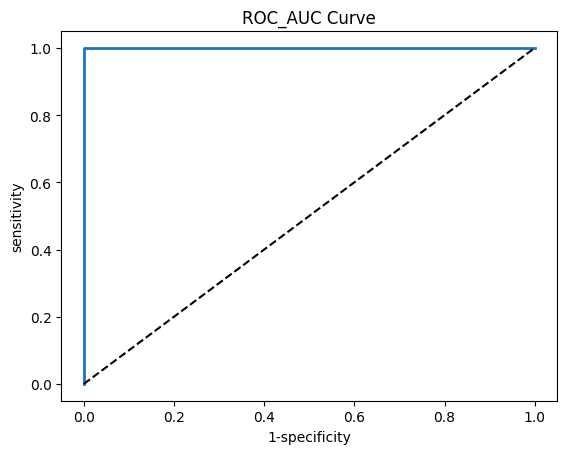

In [61]:
#Now here we create roc,auc curve.

#Here we import roc_curve function.
from sklearn.metrics import roc_curve

#Here we find the fpr,tpr and threshold.
fpr,tpr,threshold=roc_curve(y_test,y_pred_dtc)

plt.plot(fpr,tpr,linewidth=2)

plt.plot([0,1],[0,1],"k--")

plt.title("ROC_AUC Curve")
plt.xlabel("1-specificity")
plt.ylabel("sensitivity")
plt.show()

#### -----------------------------------------------------------------------------------------------
### Conclusion of Roc-Auc curve is:

##### As the fill line shows the high accuracy and show that the model is best fit.

#### ------------------------------------------------------------------------------------------------

In [62]:
#now here we find roc-auc score of rfc1.

#Here we find the roc_auc_score.
from sklearn.metrics import roc_auc_score

score=roc_auc_score(y_test,y_pred_dtc)
print(f"The roc_auc score is: {score}")

The roc_auc score is: 1.0


#### -----------------------------------------------------------------------------------------------
### Conclusion of roc-auc scores:

##### As the score is 100%.so it is best fit model.

#### ------------------------------------------------------------------------------------------------

In [63]:
#Now we do cross validation technique.

cross_scores=cross_val_score(estimator=dtc,X=x_train,y=y_train,cv=10,scoring="accuracy")
print(f"The cross_scores of knc1 model are: {(cross_scores).mean()}.")

The cross_scores of knc1 model are: 0.953125.


#### ----------------------------------------------------------------------------------------------
### Conclusion of cross validation:

##### As the cross validation score is: 95%,which is less than normal accuracy.

#### -----------------------------------------------------------------------------------------------

In [64]:
#Now we apply Random Forest classifier.

#### ------------------------------------------------------------------------------------------------
### (5) Random forest classifier.

##### As it is also works on the tree data structure and build multiple tree.

##### As it is one of the type of ensemble learning,and comes under bagging.

##### Here we apply bootstrapping and divide the dataset into small dataset with shuffle data.

##### Then we apply tree algorithm on different dataset and then apply voting on it.

##### As the voting is of two type i.e hard voting and soft voting.

##### Then we apply one final classifier model and take the mode of the result of different tree as result.

##### It is known as strong learner.

##### It is known as parallel working classifier.

##### It is working when the variance is high.

#### ---------------------------------------------------------------------------------------------------

In [65]:
#5(a) Here we create the Random forest classifier on original values.

#Here we create rfc classifier model object.
rfc=RandomForestClassifier()

#Here we train the rfc model on original data.
rfc.fit(x_train,y_train)

#Here we predict the values corresponding to x_test using rfc model.
y_pred_rfc=rfc.predict(x_test)

#Here we find the bias of rfc model.
bias_rfc=rfc.score(x_train,y_train)
print(f"The bias of rfc model is: {bias_rfc}.")

#Here we find the variance of rfc model.
variance_rfc=rfc.score(x_test,y_test)
print(f"The variance of rfc model is: {variance_rfc}.")

The bias of rfc model is: 1.0.
The variance of rfc model is: 1.0.


In [66]:
#5(b) Here we create the Random forest classifier on scaled values.

#Here we create rfc1 classifier model object.
rfc1=RandomForestClassifier()

#Here we train the rfc1 model on scaled data.
rfc1.fit(x_train_sc,y_train)

#Here we predict the values corresponding to x_test_sc using rfc1 model.
y_pred_rfc1=rfc1.predict(x_test_sc)

#Here we find the bias of rfc1 model.
bias_rfc1=rfc1.score(x_train_sc,y_train)
print(f"The bias of rfc1 model is: {bias_rfc1}.")

#Here we find the variance of rfc1 model.
variance_rfc1=rfc1.score(x_test_sc,y_test)
print(f"The variance of rfc1 model is: {variance_rfc1}.")

The bias of rfc1 model is: 1.0.
The variance of rfc1 model is: 1.0.


#### -------------------------------------------------------------------------------------------------
### Conclusion of Random forest classifier is: 

##### As for the rfc1 model, bias is 100% and variance is 100%.

##### As for the rfc1 model, bias is 100%  and variance is 100%.

#### --------------------------------------------------------------------------------------------------

The training accuracy of rfc model is: 1.0.
The testing accuracy of rfc model is: 1.0.
The confusion matrix of rfc model is: 
[[52  0]
 [ 0 28]]

The dataframe of rfc model is: 
                 Actual Yes:1  Actual No:0
Predicted Yes:1            52            0
Actual No:0                 0           28


The accuracy of rfc model is: 1.0.

The error of rfc model is: 0.0.

The precision of rfc model is: 1.0.

The recall of rfc model is: 1.0.

The f1_score of rfc model is: 1.0.

The true positive rate of rfc model is: 1.0.

The false positive rate of rfc model is: 0.0.

The classification report of rfc model is: 
[[52  0]
 [ 0 28]]


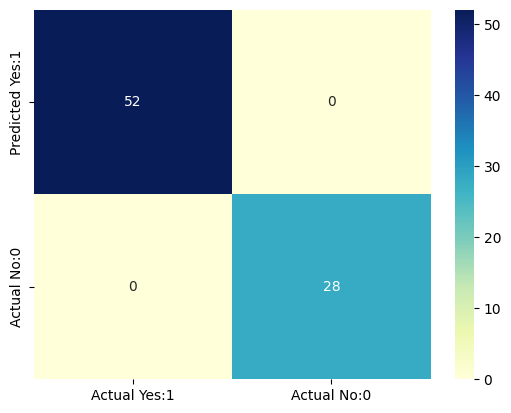

In [67]:
#Now here we find the statistics of rfc model.

#Here we find the train accuracy of rfc model.
y_pred_train_rfc=rfc.predict(x_train)
ac_train_rfc=accuracy_score(y_train,y_pred_train_rfc)
print(f"The training accuracy of rfc model is: {ac_train_rfc}.")

#Here we find the test accuracy of rfc model.
ac_test_rfc=accuracy_score(y_test,y_pred_rfc)
print(f"The testing accuracy of rfc model is: {ac_test_rfc}.")

#Now here we find the confusion matrix of rfc model.
cm_rfc=confusion_matrix(y_test,y_pred_rfc)
print("The confusion matrix of rfc model is: ")
print(cm_rfc)
print()

#Here we create the dataframe of confusion matrix.
cm_rfc_df=pd.DataFrame(cm_rfc,columns=["Actual Yes:1","Actual No:0"],index=["Predicted Yes:1","Actual No:0"])
print("The dataframe of rfc model is: ")
print(cm_rfc_df)
print()

#Now here we visualize the confusion matrix in the form of heat map.
sns.heatmap(cm_rfc_df,annot=True,fmt="d",cmap="YlGnBu")
print()

#Now here we find the terminologies related to confusion matrix.
tp_rfc=cm_rfc[0,0]
tn_rfc=cm_rfc[1,1]
fp_rfc=cm_rfc[0,1]
fn_rfc=cm_rfc[1,0]

#Now we find the accuracy of rfc model using confusion matrix.
ac_rfc_cm=(tp_rfc+tn_rfc)/(tp_rfc+tn_rfc+fp_rfc+fn_rfc)
print(f"The accuracy of rfc model is: {ac_rfc_cm}.")
print()

#Now we find the error of rfc model using confusion matrix.
error_rfc_cm=1-ac_rfc_cm
print(f"The error of rfc model is: {error_rfc_cm}.")
print()

#Now we find the precision of rfc model using confusion matrix.
precision_rfc_cm=(tp_rfc)/(tp_rfc+fp_rfc)
print(f"The precision of rfc model is: {precision_rfc_cm}.")
print()

#Now we find the recall of rfc model using confusion matrix.
recall_rfc_cm=(tp_rfc)/(tp_rfc+fn_rfc)
print(f"The recall of rfc model is: {recall_rfc_cm}.")
print()

#Now we find the f1-score of rfc model using confusion matrix.
f1_score_rfc_cm=(2*precision_rfc_cm*recall_rfc_cm)/(precision_rfc_cm+recall_rfc_cm)
print(f"The f1_score of rfc model is: {f1_score_rfc_cm}.")
print()

#Now we find the tpr of rfc model using confusion matrix.
sensitivity_rfc=tpr_rfc_cm=(tp_rfc)/(tp_rfc+fn_rfc)
print(f"The true positive rate of rfc model is: {tpr_rfc_cm}.")
print()

#Now we find the fpr of rfc model using confusion matrix.
fpr_rfc_cm=(fp_rfc)/(tn_rfc+fp_rfc)
print(f"The false positive rate of rfc model is: {fpr_rfc_cm}.")
print()

#Now here we find the classification report of rfc model.
cr_rfc=classification_report(y_test,y_pred_rfc)
print("The classification report of rfc model is: ")
print(cm_rfc)

#### ---------------------------------------------------------------------------------------------------
### Conclusion of statistic terms of rfc model: 

##### As the train and test accuracy,both is high.But the difference is very small,so it is best fit model.

##### As the error is 0%,precision is 100%,recall is 100%,f1_score is 100%.

##### As the tpr is 100% and fpr is 0%.

#### ----------------------------------------------------------------------------------------------------


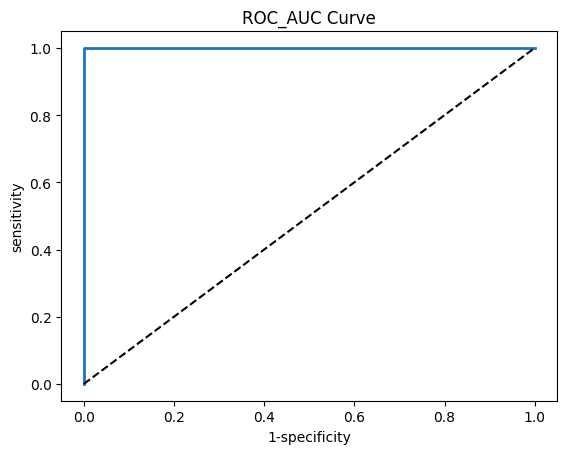

In [68]:
#Now here we create roc,auc curve.

#Here we import roc_curve function.
from sklearn.metrics import roc_curve

#Here we find the fpr,tpr and threshold.
fpr,tpr,threshold=roc_curve(y_test,y_pred_rfc)

plt.plot(fpr,tpr,linewidth=2)

plt.plot([0,1],[0,1],"k--")

plt.title("ROC_AUC Curve")
plt.xlabel("1-specificity")
plt.ylabel("sensitivity")
plt.show()

#### -----------------------------------------------------------------------------------------------
### Conclusion of Roc-Auc curve is:

##### As the fill line shows the high accuracy and show that the model is best fit.

#### ------------------------------------------------------------------------------------------------

In [69]:
#now here we find roc-auc score of rfc.

#Here we find the roc_auc_score.
from sklearn.metrics import roc_auc_score

score=roc_auc_score(y_test,y_pred_rfc)
print(f"The roc_auc score is: {score}")

The roc_auc score is: 1.0


#### -----------------------------------------------------------------------------------------------
### Conclusion of roc-auc scores:

##### As the score is 100%.so it is best fit model.

#### ------------------------------------------------------------------------------------------------

In [70]:
#Now we do cross validation technique.

cross_scores=cross_val_score(estimator=rfc,X=x_train,y=y_train,cv=10,scoring="accuracy")
print(f"The cross_scores of knc1 model are: {(cross_scores).mean()}.")

The cross_scores of knc1 model are: 0.990625.


#### ----------------------------------------------------------------------------------------------
### Conclusion of cross validation:

##### As the cross validation score is: 98.75%,which is less than normal accuracy.

#### -----------------------------------------------------------------------------------------------

In [71]:
#Now we apply Xtream gradient boosting classifier.

#### -----------------------------------------------------------------------------------------------
### (6) Xtream Gradient Boosting Classifier.

##### As it is one of the ensemble technique and known as boosting technique.

##### Here we first do bootstrapping and then we apply algorithm.

##### It is also known as sequential method and here we use the test set as that of misclassification.

##### It is used when when we have the problem of high variance.

##### Here also we use tree data structure.

##### Here we find the gloabal minima using gradient descent concept.

#### -------------------------------------------------------------------------------------------------

In [72]:
#6(a) Here we create the xtream gradient classifier on original values.

#Here we create xgb classifier model object.
xgb=XGBClassifier()

#Here we train the xgb model on original data.
xgb.fit(x_train,y_train)

#Here we predict the values corresponding to x_test using xgb model.
y_pred_xgb=xgb.predict(x_test)

#Here we find the bias of xgb model.
bias_xgb=xgb.score(x_train,y_train)
print(f"The bias of xgb model is: {bias_xgb}.")

#Here we find the variance of xgb model.
variance_xgb=xgb.score(x_test,y_test)
print(f"The variance of xgb model is: {variance_xgb}.")

The bias of xgb model is: 1.0.
The variance of xgb model is: 1.0.


In [73]:
#6(b) Here we create the xtream gradient classifier on scaled values.

#Here we create xgb classifier model object.
xgb1=XGBClassifier()

#Here we train the xgb1 model on scaled data.
xgb1.fit(x_train_sc,y_train)

#Here we predict the values corresponding to x_test_sc using xgb1 model.
y_pred_xgb1=xgb1.predict(x_test_sc)

#Here we find the bias of xgb1 model.
bias_xgb1=xgb1.score(x_train_sc,y_train)
print(f"The bias of xgb1 model is: {bias_xgb1}.")

#Here we find the variance of xgb1 model.
variance_xgb1=xgb1.score(x_test_sc,y_test)
print(f"The variance of xgb1 model is: {variance_xgb1}.")

The bias of xgb1 model is: 1.0.
The variance of xgb1 model is: 1.0.


#### -------------------------------------------------------------------------------------------------
### Conclusion of xtream gradient classifier is: 

##### As for the xgb model, bias is 100% and variance is 100%.

##### As for the xgb model, bias is 100%  and variance is 100%.

#### --------------------------------------------------------------------------------------------------

The training accuracy of xgb model is: 1.0.
The testing accuracy of xgb model is: 1.0.
The confusion matrix of xgb model is: 
[[52  0]
 [ 0 28]]

The dataframe of xgb model is: 
                 Actual Yes:1  Actual No:0
Predicted Yes:1            52            0
Actual No:0                 0           28


The accuracy of xgb model is: 1.0.

The error of xgb model is: 0.0.

The precision of xgb model is: 1.0.

The recall of xgb model is: 1.0.

The f1_score of xgb model is: 1.0.

The true positive rate of xgb model is: 1.0.

The false positive rate of xgb model is: 0.0.

The classification report of xgb model is: 
[[52  0]
 [ 0 28]]


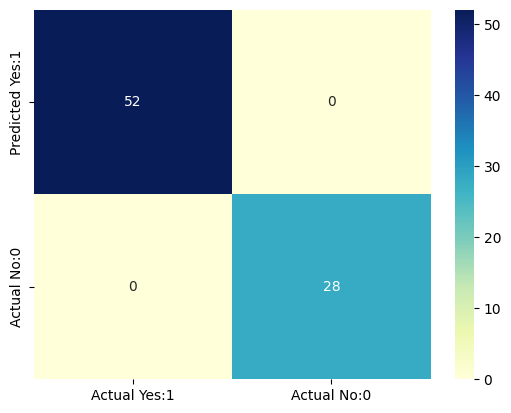

In [75]:
#Now here we find the statistics of xgb model.

#Here we find the train accuracy of xgb model.
y_pred_train_xgb=xgb.predict(x_train)
ac_train_xgb=accuracy_score(y_train,y_pred_train_xgb)
print(f"The training accuracy of xgb model is: {ac_train_xgb}.")

#Here we find the test accuracy of xgb model.
ac_test_xgb=accuracy_score(y_test,y_pred_xgb)
print(f"The testing accuracy of xgb model is: {ac_test_xgb}.")

#Now here we find the confusion matrix of xgb model.
cm_xgb=confusion_matrix(y_test,y_pred_xgb)
print("The confusion matrix of xgb model is: ")
print(cm_xgb)
print()

#Here we create the dataframe of confusion matrix.
cm_xgb_df=pd.DataFrame(cm_xgb,columns=["Actual Yes:1","Actual No:0"],index=["Predicted Yes:1","Actual No:0"])
print("The dataframe of xgb model is: ")
print(cm_xgb_df)
print()

#Now here we visualize the confusion matrix in the form of heat map.
sns.heatmap(cm_xgb_df,annot=True,fmt="d",cmap="YlGnBu")
print()

#Now here we find the terminologies related to confusion matrix.
tp_xgb=cm_xgb[0,0]
tn_xgb=cm_xgb[1,1]
fp_xgb=cm_xgb[0,1]
fn_xgb=cm_xgb[1,0]

#Now we find the accuracy of xgb model using confusion matrix.
ac_xgb_cm=(tp_xgb+tn_xgb)/(tp_xgb+tn_xgb+fp_xgb+fn_xgb)
print(f"The accuracy of xgb model is: {ac_xgb_cm}.")
print()

#Now we find the error of xgb model using confusion matrix.
error_xgb_cm=1-ac_xgb_cm
print(f"The error of xgb model is: {error_xgb_cm}.")
print()

#Now we find the precision of xgb model using confusion matrix.
precision_xgb_cm=(tp_xgb)/(tp_xgb+fp_xgb)
print(f"The precision of xgb model is: {precision_xgb_cm}.")
print()

#Now we find the recall of xgb model using confusion matrix.
recall_xgb_cm=(tp_xgb)/(tp_xgb+fn_xgb)
print(f"The recall of xgb model is: {recall_xgb_cm}.")
print()

#Now we find the f1-score of xgb model using confusion matrix.
f1_score_xgb_cm=(2*precision_xgb_cm*recall_xgb_cm)/(precision_xgb_cm+recall_xgb_cm)
print(f"The f1_score of xgb model is: {f1_score_xgb_cm}.")
print()

#Now we find the tpr of xgb model using confusion matrix.
sensitivity_xgb=tpr_xgb_cm=(tp_xgb)/(tp_xgb+fn_xgb)
print(f"The true positive rate of xgb model is: {tpr_xgb_cm}.")
print()

#Now we find the fpr of xgb model using confusion matrix.
fpr_xgb_cm=(fp_xgb)/(tn_xgb+fp_xgb)
print(f"The false positive rate of xgb model is: {fpr_xgb_cm}.")
print()

#Now here we find the classification report of xgb model.
cr_xgb=classification_report(y_test,y_pred_xgb)
print("The classification report of xgb model is: ")
print(cm_xgb)

#### ---------------------------------------------------------------------------------------------------
### Conclusion of statistic terms of xgb model: 

##### As the train and test accuracy,both is high.But the difference is very small,so it is best fit model.

##### As the error is 0%,precision is 100%,recall is 100%,f1_score is 100%.

##### As the tpr is 100% and fpr is 0%.

#### ----------------------------------------------------------------------------------------------------


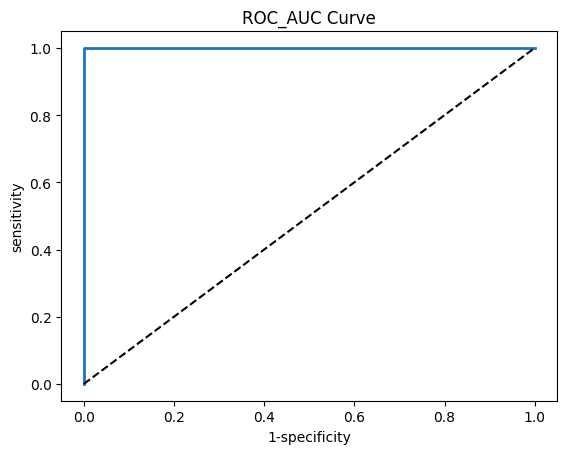

In [76]:
#Now here we create roc,auc curve.

#Here we import roc_curve function.
from sklearn.metrics import roc_curve

#Here we find the fpr,tpr and threshold.
fpr,tpr,threshold=roc_curve(y_test,y_pred_rfc)

plt.plot(fpr,tpr,linewidth=2)

plt.plot([0,1],[0,1],"k--")

plt.title("ROC_AUC Curve")
plt.xlabel("1-specificity")
plt.ylabel("sensitivity")
plt.show()

#### -----------------------------------------------------------------------------------------------
### Conclusion of Roc-Auc curve is:

##### As the fill line shows the high accuracy and show that the model is best fit.

#### ------------------------------------------------------------------------------------------------

In [77]:
#now here we find roc-auc score of rfc.

#Here we find the roc_auc_score.
from sklearn.metrics import roc_auc_score

score=roc_auc_score(y_test,y_pred_xgb)
print(f"The roc_auc score is: {score}")

The roc_auc score is: 1.0


#### -----------------------------------------------------------------------------------------------
### Conclusion of roc-auc scores:

##### As the score is 100%.so it is best fit model.

#### ------------------------------------------------------------------------------------------------

In [78]:
#Now we do cross validation technique.

cross_scores=cross_val_score(estimator=xgb,X=x_train,y=y_train,cv=10,scoring="accuracy")
print(f"The cross_scores of knc1 model are: {(cross_scores).mean()}.")

The cross_scores of knc1 model are: 0.98125.


#### ----------------------------------------------------------------------------------------------
### Conclusion of cross validation:

##### As the cross validation score is: 98.15%,which is less than normal accuracy.

#### -----------------------------------------------------------------------------------------------

In [79]:
#Now we apply the light gradient boosting machine.

#### -----------------------------------------------------------------------------------------------
### (7) Light gradient Boosting machine classifier.

##### It is one of the framework such as sklearn,xgboost.

##### It is one of the types of ensemble learning and it comes under boosting technique.

##### As it differ from xgboost in manner of gradient boost.

##### Here we firstly do boostrapping,then boosting and then do voting.

#### -------------------------------------------------------------------------------------------------

In [80]:
#7(a) Here we create the Light gradient boosting classifier on original values.

#Here we create lgbm classifier model object.
lgbm=LGBMClassifier()

#Here we train the lgbm model on original data.
lgbm.fit(x_train,y_train)

#Here we predict the values corresponding to x_test using lgbm model.
y_pred_lgbm=lgbm.predict(x_test)

#Here we find the bias of lgbm model.
bias_lgbm=lgbm.score(x_train,y_train)
print(f"The bias of lgbm model is: {bias_lgbm}.")

#Here we find the variance of lgbm model.
variance_lgbm=lgbm.score(x_test,y_test)
print(f"The variance of lgbm model is: {variance_lgbm}.")

[LightGBM] [Info] Number of positive: 122, number of negative: 198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 530
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381250 -> initscore=-0.484246
[LightGBM] [Info] Start training from score -0.484246
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

#### -----------------------------------------------------------------------------------------------
### Conclusion of light gradient boosting machine:

##### As the dataset is very small,so there is no need to use light gradient boosting algorithm.

#### ------------------------------------------------------------------------------------------------

In [81]:
#Now here we save the best model.(we save decision tree classifier i.e dtc)

pickle.dump(dtc,open(r"C:\sudhanshu_projects\project-task-training-course\chronic-kidney-disease-prediction\chronic_kidney_disease_prediction.pkl","wb"))

In [82]:
#Here we load the save model.

model=pickle.load(open(r"C:\sudhanshu_projects\project-task-training-course\chronic-kidney-disease-prediction\chronic_kidney_disease_prediction.pkl","rb"))

In [83]:
#Now we test the loaded model.

model.score(x_test,y_test)

1.0